<a href="https://colab.research.google.com/github/alvafox/Hello-world/blob/main/AAP_(REDONDEO).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cálculo de los Antecedentes Académicos de Pregrado (AAP)

In [ ]:
!pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 37.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 KB 47.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.0/300.0 KB 24.4 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import decimal

Se define el criterio de redondeo

In [ ]:
from decimal import Decimal as D
context = decimal.getcontext()
context.rounding = decimal.ROUND_HALF_UP

Subir archivo en formato CSV con las siguientes columnas (sin espacios). Ojo que el nombre del archivo a cargar debe ser "CONCURSO.csv".

- Las columnas numericas: (i) NOTA PREGRADO, (ii) RANKING, (iii) TOTAL y (iv) % RANKING deben ser numéricas. Esto significa que las celdas con texto deben ser reemplazadas por un cero o el número que corresponda.

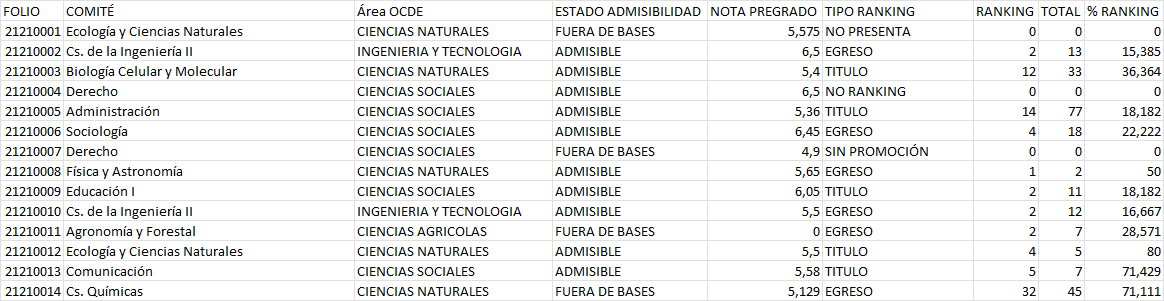

In [ ]:
from google.colab import files
files.upload()

Se leen los datos del concurso desde el archivo "CONCURSO.CSV"

In [ ]:
Concurso = pd.read_csv("CONCURSO.csv", sep=";", encoding="latin-1", decimal=',')
Concurso.info()
Concurso.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2440 entries, 0 to 2439
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   FOLIO                 2440 non-null   int64  
 1   GENERO                2440 non-null   object 
 2   NOMBRE                2440 non-null   object 
 3   COMITÉ                2440 non-null   object 
 4   Área OCDE             2440 non-null   object 
 5   ESTADO ADMISIBILIDAD  2440 non-null   object 
 6   NOTA PREGRADO         2440 non-null   float64
 7   TIPO RANKING          2440 non-null   object 
 8   RANKING               2440 non-null   int64  
 9   TOTAL                 2440 non-null   int64  
 10  % RANKING             2440 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 209.8+ KB


Index(['FOLIO', 'GENERO', 'NOMBRE', 'COMITÉ', 'Área OCDE',
       'ESTADO ADMISIBILIDAD', 'NOTA PREGRADO', 'TIPO RANKING', 'RANKING',
       'TOTAL', '% RANKING'],
      dtype='object')

In [ ]:
Concurso

,FOLIO,GENERO,NOMBRE,COMITÉ,Área OCDE,ESTADO ADMISIBILIDAD,NOTA PREGRADO,TIPO RANKING,RANKING,TOTAL,% RANKING
0,21230002,Masculino,Hernan Hernandez Manzano,Cs. de la Ingeniería I,INGENIERIA Y TECNOLOGIA,ADMISIBLE,5.77,NO RANKING,0,0,0.000
1,21230003,Femenino,Cinthia Lorena Jaramillo Lucas,Derecho,CIENCIAS SOCIALES,FUERA DE BASES,0.00,NO PRESENTA,0,0,0.000
2,21230004,Femenino,Amanda de la Caridad Lorenzo Carreiro,Psicología,CIENCIAS SOCIALES,FUERA DE BASES,0.00,NO RANKING,0,0,0.000
3,21230005,Masculino,Alejandro Carrillo Vitale,Administración,CIENCIAS SOCIALES,FUERA DE BASES,0.00,NO RANKING,0,0,0.000
4,21230006,Masculino,Eduardo Alejandro Avila Acevedo,Ecología y Ciencias Naturales,CIENCIAS NATURALES,ADMISIBLE,5.00,EGRESO,1,1,100.000
...,...,...,...,...,...,...,...,...,...,...,...
2435,21232437,Femenino,Valentina Patricia Silva Pedreros,Ecología y Ciencias Naturales,CIENCIAS NATURALES,ADMISIBLE,6.09,SIN PROMOCIÓN,18,81,22.222
2436,21232438,Masculino,Ernesto Muñoz Lamartine,Derecho,CIENCIAS SOCIALES,FUERA DE BASES,5.03,EGRESO,89,268,33.209
2437,21232439,Masculino,Julio Cesar Cornejo Muñoz,Agronomía y Forestal,CIENCIAS AGRICOLAS,FUERA DE BASES,0.00,NO RANKING,0,0,0.000
2438,21232440,Femenino,Maria Carolina Smok Soto,Cs. Veterinarias,CIENCIAS AGRICOLAS,ADMISIBLE,6.20,EGRESO,72,98,73.469


In [ ]:
Concurso["NOTA PREGRADO"] = Concurso["NOTA PREGRADO"].fillna(0).astype('float64')
Concurso["RANKING"] = Concurso["RANKING"].fillna(0).astype('float64')
Concurso["TOTAL"] = Concurso["TOTAL"].fillna(0).astype('float64')
Concurso["% RANKING"] = Concurso["% RANKING"].fillna(0).astype('float64')

In [ ]:
Valor_Nota = []
Nota = []

for index, row in Concurso.iterrows():
    if row["NOTA PREGRADO"] == 0.000:
        Nota = D('0.000')
    else:
        Nota = row["NOTA PREGRADO"]
        Nota = round(D(str(Nota)), 3)
    print(row["FOLIO"], "=>", Nota, "[Nota]")
    Valor_Nota.append(Nota)

Concurso["NOTA PREGRADO"] = Valor_Nota
print(Concurso["NOTA PREGRADO"])
print(Concurso.dtypes)

21230002 => 5.770 [Nota]
21230003 => 0.000 [Nota]
21230004 => 0.000 [Nota]
21230005 => 0.000 [Nota]
21230006 => 5.000 [Nota]
21230007 => 6.500 [Nota]
21230008 => 6.200 [Nota]
21230009 => 5.670 [Nota]
21230010 => 0.000 [Nota]
21230011 => 0.000 [Nota]
21230012 => 6.100 [Nota]
21230013 => 5.298 [Nota]
21230014 => 5.000 [Nota]
21230015 => 5.500 [Nota]
21230016 => 6.300 [Nota]
21230017 => 6.700 [Nota]
21230018 => 6.270 [Nota]
21230019 => 5.300 [Nota]
21230020 => 6.530 [Nota]
21230021 => 6.400 [Nota]
21230022 => 5.200 [Nota]
21230023 => 6.235 [Nota]
21230024 => 6.080 [Nota]
21230025 => 5.700 [Nota]
21230026 => 5.300 [Nota]
21230027 => 6.980 [Nota]
21230028 => 5.800 [Nota]
21230029 => 5.040 [Nota]
21230030 => 6.200 [Nota]
21230031 => 5.900 [Nota]
21230032 => 5.400 [Nota]
21230033 => 5.500 [Nota]
21230034 => 0.000 [Nota]
21230035 => 5.600 [Nota]
21230036 => 6.100 [Nota]
21230037 => 5.300 [Nota]
21230038 => 6.400 [Nota]
21230039 => 4.660 [Nota]
21230040 => 5.700 [Nota]
21230041 => 5.050 [Nota]


In [ ]:
Puntaje_Y = []
Valor_Y = []

for index, row in Concurso.iterrows():
    if (row["NOTA PREGRADO"] == 0.000) | (row["ESTADO ADMISIBILIDAD"] == "FUERA DE BASES"):
        Valor_Y = D('0.000')
    else:
        Valor_Y = 10-(35/round(D(str(row["NOTA PREGRADO"])), 3))
        Valor_Y = round(D(str(Valor_Y)), 3)
    print(row["FOLIO"], "=>" , Valor_Y, "[Puntaje Nota]")
    Puntaje_Y.append(Valor_Y)

Concurso["Y"] = Puntaje_Y
print(Concurso["Y"])
print(Concurso.dtypes)

21230002 => 3.934 [Puntaje Nota]
21230003 => 0.000 [Puntaje Nota]
21230004 => 0.000 [Puntaje Nota]
21230005 => 0.000 [Puntaje Nota]
21230006 => 3.000 [Puntaje Nota]
21230007 => 0.000 [Puntaje Nota]
21230008 => 4.355 [Puntaje Nota]
21230009 => 3.827 [Puntaje Nota]
21230010 => 0.000 [Puntaje Nota]
21230011 => 0.000 [Puntaje Nota]
21230012 => 4.262 [Puntaje Nota]
21230013 => 3.394 [Puntaje Nota]
21230014 => 3.000 [Puntaje Nota]
21230015 => 3.636 [Puntaje Nota]
21230016 => 4.444 [Puntaje Nota]
21230017 => 4.776 [Puntaje Nota]
21230018 => 4.418 [Puntaje Nota]
21230019 => 3.396 [Puntaje Nota]
21230020 => 4.640 [Puntaje Nota]
21230021 => 4.531 [Puntaje Nota]
21230022 => 3.269 [Puntaje Nota]
21230023 => 4.387 [Puntaje Nota]
21230024 => 4.243 [Puntaje Nota]
21230025 => 3.860 [Puntaje Nota]
21230026 => 3.396 [Puntaje Nota]
21230027 => 4.986 [Puntaje Nota]
21230028 => 3.966 [Puntaje Nota]
21230029 => 0.000 [Puntaje Nota]
21230030 => 4.355 [Puntaje Nota]
21230031 => 0.000 [Puntaje Nota]
21230032 =

In [ ]:
Puntaje_RNK = []
Valor_RNK = []

for index, row in Concurso.iterrows():
    if (row["TIPO RANKING"] != "NO RANKING") and (row["RANKING"] > 0) and (row["TOTAL"] > 0):
        Valor_RNK = 100*D(str(row["RANKING"]))/D(str(row["TOTAL"]))
        Valor_RNK = round(D(str(Valor_RNK)), 3)
    elif (row["TIPO RANKING"] != "NO RANKING") and (row["RANKING"] == 0) and (row["TOTAL"] == 0) and (row["% RANKING"] > 1):
        Valor_RNK = round(D(str(row["% RANKING"])), 3)
    elif (row["TIPO RANKING"] != "NO RANKING") and (row["RANKING"] == 0) and (row["TOTAL"] == 0) and (row["% RANKING"] <= 1):
        Valor_RNK = 100*D(str(row["% RANKING"]))
        Valor_RNK = round(D(str(Valor_RNK)), 3)
    elif (row["TIPO RANKING"] == "NO RANKING") and (row["RANKING"] == 0) and (row["TOTAL"] == 0):
        Valor_RNK = 0.000
    else:
        Valor_RNK = 0.000
    Puntaje_RNK.append(Valor_RNK)

Concurso["% RANKING"] = Puntaje_RNK
print(Concurso["% RANKING"])
print(Concurso.dtypes)

0           0.0
1         0.000
2           0.0
3           0.0
4       100.000
         ...   
2435     22.222
2436     33.209
2437        0.0
2438     73.469
2439      9.524
Name: % RANKING, Length: 2440, dtype: object
FOLIO                     int64
GENERO                   object
NOMBRE                   object
COMITÉ                   object
Área OCDE                object
ESTADO ADMISIBILIDAD     object
NOTA PREGRADO            object
TIPO RANKING             object
RANKING                 float64
TOTAL                   float64
% RANKING                object
Y                        object
dtype: object


In [ ]:
Puntaje_Q = []
Valor_Q = []

for index, row in Concurso.iterrows():
    if row["ESTADO ADMISIBILIDAD"] == "FUERA DE BASES":
        Valor_Q = D('0.000')
    elif (row["ESTADO ADMISIBILIDAD"] != "FUERA DE BASES") and (row["TIPO RANKING"] == "NO RANKING"):
        Valor_Q = D('0.000')
    elif (row["ESTADO ADMISIBILIDAD"] != "FUERA DE BASES") and (row["TIPO RANKING"] != "NO RANKING") and (row["RANKING"] == 1):
        Valor_Q = D('5.000')
    elif (row["ESTADO ADMISIBILIDAD"] != "FUERA DE BASES") and (row["TIPO RANKING"] != "NO RANKING") and (row["RANKING"] != 1) and (row["% RANKING"] > 30.0):
        Valor_Q = D('-0.0429')*(round(D(str(row["% RANKING"])), 3)) + D('4.29')
        Valor_Q = round(D(str(Valor_Q)), 3)
    elif (row["ESTADO ADMISIBILIDAD"] != "FUERA DE BASES") and (row["TIPO RANKING"] != "NO RANKING") and (row["RANKING"] != 1) and (row["% RANKING"] <= 30.0):
        Valor_Q = D('-0.002')*(round(D(str(row["% RANKING"])), 3))**2 - D('0.00666667')*(round(D(str(row["% RANKING"])), 3)) + 5
        Valor_Q = round(D(str(Valor_Q)), 3)
    Puntaje_Q.append(Valor_Q)

Concurso["Q"] = Puntaje_Q
print(Concurso["Q"])
print(Concurso.dtypes)

0       0.000
1       0.000
2       0.000
3       0.000
4       5.000
        ...  
2435    3.864
2436    0.000
2437    0.000
2438    1.138
2439    4.755
Name: Q, Length: 2440, dtype: object
FOLIO                     int64
GENERO                   object
NOMBRE                   object
COMITÉ                   object
Área OCDE                object
ESTADO ADMISIBILIDAD     object
NOTA PREGRADO            object
TIPO RANKING             object
RANKING                 float64
TOTAL                   float64
% RANKING                object
Y                        object
Q                        object
dtype: object


In [ ]:
Puntaje_P = []
Valor_P = []

for index, row in Concurso.iterrows():
    if row["ESTADO ADMISIBILIDAD"] == "FUERA DE BASES":
        Valor_P = D('0.000')
    elif (row["ESTADO ADMISIBILIDAD"] != "FUERA DE BASES") and (row["RANKING"] == 1):
        Valor_P = D('5.000')
    elif (row["ESTADO ADMISIBILIDAD"] != "FUERA DE BASES") and (row["RANKING"] != 1):
        Valor_P = row["Y"]
        Valor_P = round(D(str(Valor_P)), 3)
    Puntaje_P.append(Valor_P)

Concurso["P"] = Puntaje_P
print(Concurso["P"])
print(Concurso.dtypes)

0       3.934
1       0.000
2       0.000
3       0.000
4       5.000
        ...  
2435    4.253
2436    0.000
2437    0.000
2438    4.355
2439    4.531
Name: P, Length: 2440, dtype: object
FOLIO                     int64
GENERO                   object
NOMBRE                   object
COMITÉ                   object
Área OCDE                object
ESTADO ADMISIBILIDAD     object
NOTA PREGRADO            object
TIPO RANKING             object
RANKING                 float64
TOTAL                   float64
% RANKING                object
Y                        object
Q                        object
P                        object
dtype: object


In [ ]:
Puntaje_PQ = []
Valor_PQ = []

for index, row in Concurso.iterrows():
    if row["ESTADO ADMISIBILIDAD"] == "FUERA DE BASES":
        Valor_PQ = D('0.000')
    elif (row["ESTADO ADMISIBILIDAD"] != "FUERA DE BASES") and (row["TIPO RANKING"] == "NO RANKING"):
        Valor_PQ = row["P"] * (D(str(50-row["TOTAL"]))/20) + row["Q"] * ((D(str(row["TOTAL"]-30)))/20)
        Valor_PQ = round(D(str(Valor_PQ)), 3)
    elif (row["ESTADO ADMISIBILIDAD"] != "FUERA DE BASES") and (row["TIPO RANKING"] != "NO RANKING") and (row["RANKING"] == 1):
        Valor_PQ = D('5.000')
    elif (row["ESTADO ADMISIBILIDAD"] != "FUERA DE BASES") and (row["TIPO RANKING"] != "NO RANKING") and (row["RANKING"] != 1):
        Valor_PQ = row["P"] * (D(str(50-row["TOTAL"]))/20) + row["Q"] * ((D(str(row["TOTAL"]-30)))/20)
        Valor_PQ = round(D(str(Valor_PQ)), 3)
    Puntaje_PQ.append(Valor_PQ)

Concurso["PQ"] = Puntaje_PQ
print(Concurso["PQ"])
print(Concurso.dtypes)

0        9.835
1        0.000
2        0.000
3        0.000
4        5.000
         ...  
2435     3.261
2436     0.000
2437     0.000
2438    -6.583
2439     4.665
Name: PQ, Length: 2440, dtype: object
FOLIO                     int64
GENERO                   object
NOMBRE                   object
COMITÉ                   object
Área OCDE                object
ESTADO ADMISIBILIDAD     object
NOTA PREGRADO            object
TIPO RANKING             object
RANKING                 float64
TOTAL                   float64
% RANKING                object
Y                        object
Q                        object
P                        object
PQ                       object
dtype: object


In [ ]:
Puntaje_Rx = []
Valor_Rx = []

for index, row in Concurso.iterrows():
    if row["ESTADO ADMISIBILIDAD"] == "FUERA DE BASES":
        Valor_Rx = D('0.000')
    elif (row["TOTAL"] < 30) and (row["TOTAL"] > 0) and (row["TIPO RANKING"] != "NO RANKING") and (row["RANKING"] > 0):
        Valor_Rx = row["P"]
    elif (row["TOTAL"] >= 30) and (row["TOTAL"] <= 50) and (row["TIPO RANKING"] != "NO RANKING") and (row["RANKING"] > 0):
        Valor_Rx = row["PQ"]
    elif (row["TOTAL"] > 50) and (row["TIPO RANKING"] != "NO RANKING") and (row["RANKING"] > 0):
        Valor_Rx = row["Q"]
    elif row["TIPO RANKING"] == "NO RANKING":
        Valor_Rx = row["Y"]
    elif (row["% RANKING"] > 0) and (row["RANKING"] == 0) and (row["TOTAL"] == 0):
        Valor_Rx = row["Q"]
    print(row["FOLIO"], "=>", Valor_Rx, "[Puntaje Ranking]")
    Puntaje_Rx.append(Valor_Rx)

Concurso["Rx"] = Puntaje_Rx
print(Concurso["Rx"])
print(Concurso.dtypes)

21230002 => 3.934 [Puntaje Ranking]
21230003 => 0.000 [Puntaje Ranking]
21230004 => 0.000 [Puntaje Ranking]
21230005 => 0.000 [Puntaje Ranking]
21230006 => 5.000 [Puntaje Ranking]
21230007 => 0.000 [Puntaje Ranking]
21230008 => 4.355 [Puntaje Ranking]
21230009 => 3.827 [Puntaje Ranking]
21230010 => 0.000 [Puntaje Ranking]
21230011 => 0.000 [Puntaje Ranking]
21230012 => 3.147 [Puntaje Ranking]
21230013 => 3.394 [Puntaje Ranking]
21230014 => 3.000 [Puntaje Ranking]
21230015 => 3.636 [Puntaje Ranking]
21230016 => 4.444 [Puntaje Ranking]
21230017 => 4.679 [Puntaje Ranking]
21230018 => 5.000 [Puntaje Ranking]
21230019 => 3.396 [Puntaje Ranking]
21230020 => 5.000 [Puntaje Ranking]
21230021 => 4.531 [Puntaje Ranking]
21230022 => 3.278 [Puntaje Ranking]
21230023 => 5.000 [Puntaje Ranking]
21230024 => 1.766 [Puntaje Ranking]
21230025 => 4.511 [Puntaje Ranking]
21230026 => 1.980 [Puntaje Ranking]
21230027 => 5.000 [Puntaje Ranking]
21230028 => 4.532 [Puntaje Ranking]
21230029 => 0.000 [Puntaje R

In [ ]:
Intervalo = []
Valor_Intervalo = []

for index, row in Concurso.iterrows():
    if (row["ESTADO ADMISIBILIDAD"] == "FUERA DE BASES"):
        Valor_Intervalo = "FDB"
    elif (row["ESTADO ADMISIBILIDAD"] != "FUERA DE BASES") and (row["TOTAL"] < 30) and (row["RANKING"] > 0) and (row["TOTAL"] > 0):
        Valor_Intervalo = "X < 30"
    elif (row["ESTADO ADMISIBILIDAD"] != "FUERA DE BASES") and (row["TOTAL"] >= 30) and (row["TOTAL"] <= 50) and (row["RANKING"] > 0) and (row["TOTAL"] > 0):
        Valor_Intervalo = "30 <= X <= 50"
    elif (row["ESTADO ADMISIBILIDAD"] != "FUERA DE BASES") and (row["TOTAL"] > 50) and (row["RANKING"] > 0) and (row["TOTAL"] > 0):
        Valor_Intervalo = "50 < X"
    elif (row["ESTADO ADMISIBILIDAD"] != "FUERA DE BASES") and (row["TIPO RANKING"] == "NO RANKING") and (row["RANKING"] == 0) and (row["TOTAL"] == 0):
        Valor_Intervalo = "X < 30 (NO RANKING)"
    elif (row["ESTADO ADMISIBILIDAD"] != "FUERA DE BASES") and (row["% RANKING"] != 0) and (row["RANKING"] == 0) and (row["TOTAL"] == 0):
        Valor_Intervalo = "50 < X (% RANKING)"
    print(row["FOLIO"], "=>", Valor_Intervalo)
    Intervalo.append(Valor_Intervalo)

Concurso["Intervalo"] = Intervalo
print(Concurso["Intervalo"])
print(Concurso.dtypes)

21230002 => X < 30 (NO RANKING)
21230003 => FDB
21230004 => FDB
21230005 => FDB
21230006 => X < 30
21230007 => FDB
21230008 => X < 30
21230009 => X < 30
21230010 => FDB
21230011 => FDB
21230012 => 50 < X
21230013 => X < 30
21230014 => X < 30
21230015 => X < 30
21230016 => X < 30
21230017 => 50 < X
21230018 => X < 30
21230019 => X < 30
21230020 => X < 30
21230021 => X < 30
21230022 => 50 < X
21230023 => X < 30
21230024 => 50 < X
21230025 => 50 < X
21230026 => 50 < X
21230027 => 30 <= X <= 50
21230028 => 30 <= X <= 50
21230029 => FDB
21230030 => X < 30
21230031 => FDB
21230032 => 30 <= X <= 50
21230033 => 30 <= X <= 50
21230034 => FDB
21230035 => 50 < X
21230036 => 30 <= X <= 50
21230037 => X < 30
21230038 => X < 30
21230039 => FDB
21230040 => 50 < X
21230041 => 30 <= X <= 50
21230042 => X < 30
21230043 => X < 30
21230044 => 30 <= X <= 50
21230045 => FDB
21230046 => X < 30
21230047 => 50 < X
21230048 => X < 30
21230049 => 50 < X
21230050 => 30 <= X <= 50
21230051 => FDB
21230052 => FDB
2

In [ ]:
Puntaje_AAP = []
Valor_AAP = []

for index, row in Concurso.iterrows():
    if row["ESTADO ADMISIBILIDAD"] == "FUERA DE BASES":
        Valor_AAP = D('0.000')
    else:
        Valor_AAP = D('0.5') * row["Y"] + D('0.5') * row["Rx"]
        Valor_AAP = round(D(str(Valor_AAP)), 3)
    print(row["FOLIO"], ':','0.5 *', row["Y"], '+ 0.5 *', row["Rx"] ,"=", D('0.5') * row["Y"] + D('0.5') * row["Rx"],'| ROUND =>', Valor_AAP, "[AAP]")
    Puntaje_AAP.append(Valor_AAP)

Concurso["AAP"] = Puntaje_AAP

print(Concurso["AAP"])
print(Concurso.dtypes)

21230002 : 0.5 * 3.934 + 0.5 * 3.934 = 3.9340 | ROUND => 3.934 [AAP]
21230003 : 0.5 * 0.000 + 0.5 * 0.000 = 0.0000 | ROUND => 0.000 [AAP]
21230004 : 0.5 * 0.000 + 0.5 * 0.000 = 0.0000 | ROUND => 0.000 [AAP]
21230005 : 0.5 * 0.000 + 0.5 * 0.000 = 0.0000 | ROUND => 0.000 [AAP]
21230006 : 0.5 * 3.000 + 0.5 * 5.000 = 4.0000 | ROUND => 4.000 [AAP]
21230007 : 0.5 * 0.000 + 0.5 * 0.000 = 0.0000 | ROUND => 0.000 [AAP]
21230008 : 0.5 * 4.355 + 0.5 * 4.355 = 4.3550 | ROUND => 4.355 [AAP]
21230009 : 0.5 * 3.827 + 0.5 * 3.827 = 3.8270 | ROUND => 3.827 [AAP]
21230010 : 0.5 * 0.000 + 0.5 * 0.000 = 0.0000 | ROUND => 0.000 [AAP]
21230011 : 0.5 * 0.000 + 0.5 * 0.000 = 0.0000 | ROUND => 0.000 [AAP]
21230012 : 0.5 * 4.262 + 0.5 * 3.147 = 3.7045 | ROUND => 3.704 [AAP]
21230013 : 0.5 * 3.394 + 0.5 * 3.394 = 3.3940 | ROUND => 3.394 [AAP]
21230014 : 0.5 * 3.000 + 0.5 * 3.000 = 3.0000 | ROUND => 3.000 [AAP]
21230015 : 0.5 * 3.636 + 0.5 * 3.636 = 3.6360 | ROUND => 3.636 [AAP]
21230016 : 0.5 * 4.444 + 0.5 * 4.4

In [ ]:
Concurso["NOTA PREGRADO"] = Concurso["NOTA PREGRADO"].astype(float)
Concurso["% RANKING"] = Concurso["% RANKING"].astype(float)
Concurso["Y"] = Concurso["Y"].astype(float)
Concurso["P"] = Concurso["P"].astype(float)
Concurso["PQ"] = Concurso["PQ"].astype(float)
Concurso["Q"] = Concurso["Q"].astype(float)
Concurso["Rx"] = Concurso["Rx"].astype(float)
Concurso["AAP"] = Concurso["AAP"].astype(float)

#Reordenar columnas

Concurso = Concurso[["FOLIO", "GENERO", "COMITÉ", "Área OCDE", "ESTADO ADMISIBILIDAD", "NOTA PREGRADO", "TIPO RANKING", "RANKING", "TOTAL", "% RANKING", "Y", "P", "PQ", "Q", "Rx", "Intervalo", "AAP"]]

print(Concurso.dtypes)

FOLIO                     int64
GENERO                   object
COMITÉ                   object
Área OCDE                object
ESTADO ADMISIBILIDAD     object
NOTA PREGRADO           float64
TIPO RANKING             object
RANKING                 float64
TOTAL                   float64
% RANKING               float64
Y                       float64
P                       float64
PQ                      float64
Q                       float64
Rx                      float64
Intervalo                object
AAP                     float64
dtype: object


In [ ]:
Concurso

,FOLIO,GENERO,COMITÉ,Área OCDE,ESTADO ADMISIBILIDAD,NOTA PREGRADO,TIPO RANKING,RANKING,TOTAL,% RANKING,Y,P,PQ,Q,Rx,Intervalo,AAP
0,21230002,Masculino,Cs. de la Ingeniería I,INGENIERIA Y TECNOLOGIA,ADMISIBLE,5.77,NO RANKING,0.0,0.0,0.000,3.934,3.934,9.835,0.000,3.934,X < 30 (NO RANKING),3.934
1,21230003,Femenino,Derecho,CIENCIAS SOCIALES,FUERA DE BASES,0.00,NO PRESENTA,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,FDB,0.000
2,21230004,Femenino,Psicología,CIENCIAS SOCIALES,FUERA DE BASES,0.00,NO RANKING,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,FDB,0.000
3,21230005,Masculino,Administración,CIENCIAS SOCIALES,FUERA DE BASES,0.00,NO RANKING,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,FDB,0.000
4,21230006,Masculino,Ecología y Ciencias Naturales,CIENCIAS NATURALES,ADMISIBLE,5.00,EGRESO,1.0,1.0,100.000,3.000,5.000,5.000,5.000,5.000,X < 30,4.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2435,21232437,Femenino,Ecología y Ciencias Naturales,CIENCIAS NATURALES,ADMISIBLE,6.09,SIN PROMOCIÓN,18.0,81.0,22.222,4.253,4.253,3.261,3.864,3.864,50 < X,4.058
2436,21232438,Masculino,Derecho,CIENCIAS SOCIALES,FUERA DE BASES,5.03,EGRESO,89.0,268.0,33.209,0.000,0.000,0.000,0.000,0.000,FDB,0.000
2437,21232439,Masculino,Agronomía y Forestal,CIENCIAS AGRICOLAS,FUERA DE BASES,0.00,NO RANKING,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,FDB,0.000
2438,21232440,Femenino,Cs. Veterinarias,CIENCIAS AGRICOLAS,ADMISIBLE,6.20,EGRESO,72.0,98.0,73.469,4.355,4.355,-6.583,1.138,1.138,50 < X,2.746


In [ ]:
Concurso[Concurso["ESTADO ADMISIBILIDAD"] == "ADMISIBLE"].groupby([pd.cut(Concurso[Concurso["ESTADO ADMISIBILIDAD"] == "ADMISIBLE"].AAP, [0.000, 0.500, 1.000, 1.500, 2.000, 2.500, 3.000, 3.500, 4.000, 4.500, 5.001], right=False, include_lowest=True)])["FOLIO"].count().to_frame()

,FOLIO
AAP,
"[0.0, 0.5)",0
"[0.5, 1.0)",0
"[1.0, 1.5)",0
"[1.5, 2.0)",8
"[2.0, 2.5)",39
"[2.5, 3.0)",106
"[3.0, 3.5)",407
"[3.5, 4.0)",603
"[4.0, 4.5)",576


[Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '8'),
 Text(0, 0, '39'),
 Text(0, 0, '106'),
 Text(0, 0, '407'),
 Text(0, 0, '603'),
 Text(0, 0, '576'),
 Text(0, 0, '415')]

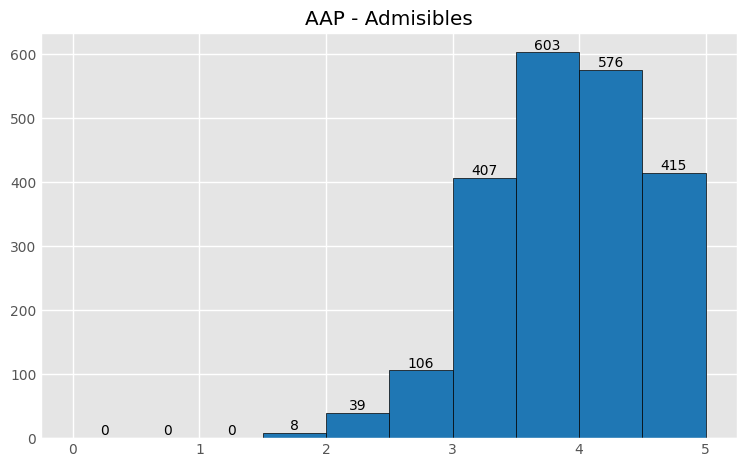

In [ ]:
GRAFICO = Concurso[Concurso["ESTADO ADMISIBILIDAD"] == "ADMISIBLE"]

plt.style.use('ggplot')
plt.figure(figsize=(8, 5))
counts, edges, bars = plt.hist(GRAFICO[["AAP"]], bins=[0.000, 0.500, 1.000, 1.500, 2.000, 2.500, 3.000, 3.500, 4.000, 4.500, 5.000], edgecolor='k', facecolor='#1f77b4')

plt.title("AAP - Admisibles")
plt.bar_label(bars)

In [ ]:
Concurso[Concurso["ESTADO ADMISIBILIDAD"] == "ADMISIBLE"].groupby(["GENERO"]).agg({"AAP":["count","min","median","mean","max"]}).round(3)

AAP                          
          count    min median   mean  max
GENERO                                   
Femenino    912  1.722  3.966  3.898  5.0
Masculino  1242  1.662  3.936  3.873  5.0

GENERO,Femenino,Masculino
AAP,,
"[0.0, 0.5)",0,0
"[0.5, 1.0)",0,0
"[1.0, 1.5)",0,0
"[1.5, 2.0)",2,6
"[2.0, 2.5)",13,26
"[2.5, 3.0)",40,66
"[3.0, 3.5)",170,237
"[3.5, 4.0)",260,343
"[4.0, 4.5)",250,326


<AxesSubplot: xlabel='AAP'>

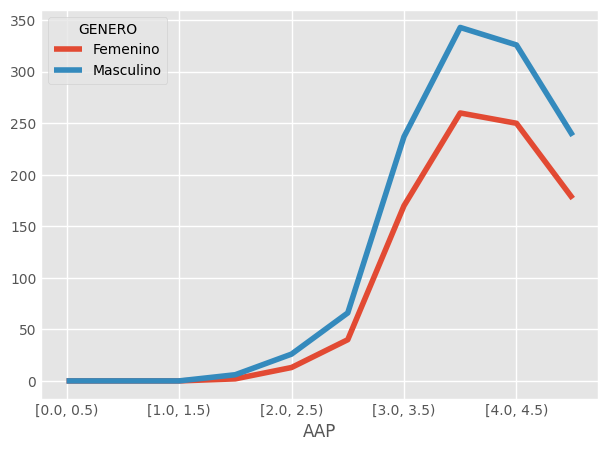

In [ ]:
tab = Concurso[(Concurso["ESTADO ADMISIBILIDAD"] == "ADMISIBLE")]
display(tab.groupby(["GENERO", pd.cut(tab.AAP, [0.000, 0.500, 1.000, 1.500, 2.000, 2.500, 3.000, 3.500, 4.000, 4.500, 5.001], right=False, include_lowest=True)])["FOLIO"].count().unstack(0))


plt.style.use('ggplot')
display(tab.groupby(["GENERO", pd.cut(tab.AAP, [0.000, 0.500, 1.000, 1.500, 2.000, 2.500, 3.000, 3.500, 4.000, 4.500, 5.001], right=False, include_lowest=True)])["FOLIO"].count().unstack(0).plot())

GENERO,Femenino,Masculino,Delta
AAP,,,
"[0.0, 0.5)",0,0,0
"[0.5, 1.0)",0,0,0
"[1.0, 1.5)",0,0,0
"[1.5, 2.0)",2,6,4
"[2.0, 2.5)",13,26,13
"[2.5, 3.0)",40,66,26
"[3.0, 3.5)",170,237,67
"[3.5, 4.0)",260,343,83
"[4.0, 4.5)",250,326,76


<AxesSubplot: xlabel='AAP'>

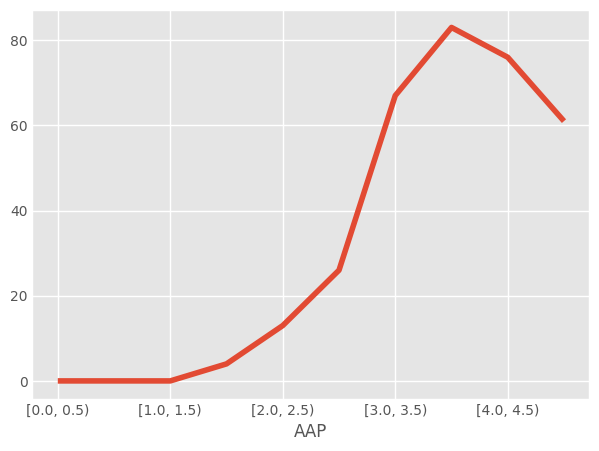

In [ ]:
data_gen = tab.groupby(["GENERO", pd.cut(tab.AAP, [0.000, 0.500, 1.000, 1.500, 2.000, 2.500, 3.000, 3.500, 4.000, 4.500, 5.001], right=False, include_lowest=True)])["FOLIO"].count().unstack(0)

data_gen["Delta"] = data_gen["Masculino"] - data_gen["Femenino"] 

display(data_gen)

display(data_gen["Delta"].plot())

In [ ]:
data_gen["Masculino"].sum() + data_gen["Femenino"].sum()

2154

[Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '2'),
 Text(0, 0, '13'),
 Text(0, 0, '40'),
 Text(0, 0, '170'),
 Text(0, 0, '260'),
 Text(0, 0, '250'),
 Text(0, 0, '177')]

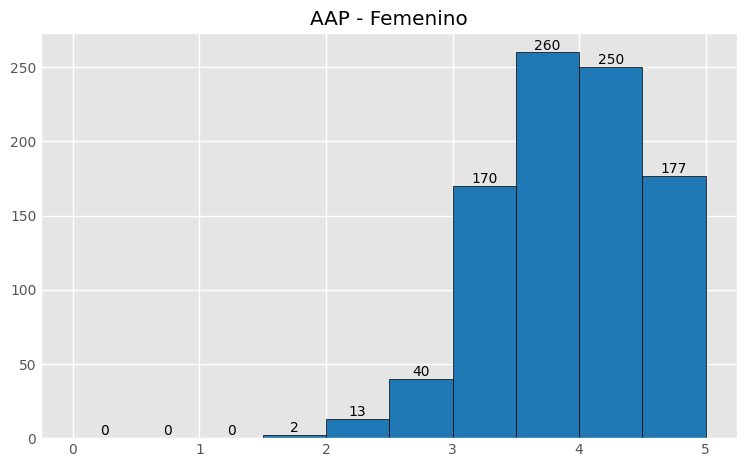

In [ ]:
GRAFICO = Concurso[(Concurso["ESTADO ADMISIBILIDAD"] == "ADMISIBLE") & (Concurso["GENERO"] == "Femenino")]

plt.figure(figsize=(8, 5))
counts, edges, bars = plt.hist(GRAFICO[["AAP"]], bins=[0.000, 0.500, 1.000, 1.500, 2.000, 2.500, 3.000, 3.500, 4.000, 4.500, 5.000], edgecolor='k', facecolor='#1f77b4')
plt.title("AAP - Femenino")

plt.bar_label(bars)

[Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '6'),
 Text(0, 0, '26'),
 Text(0, 0, '66'),
 Text(0, 0, '237'),
 Text(0, 0, '343'),
 Text(0, 0, '326'),
 Text(0, 0, '238')]

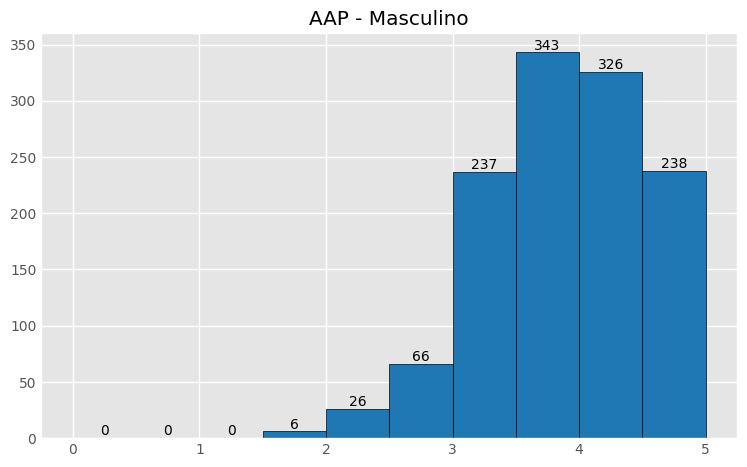

In [ ]:
GRAFICO = Concurso[(Concurso["ESTADO ADMISIBILIDAD"] == "ADMISIBLE") & (Concurso["GENERO"] == "Masculino")]

plt.style.use('ggplot')
plt.figure(figsize=(8, 5))
counts, edges, bars = plt.hist(GRAFICO[["AAP"]], bins=[0.000, 0.500, 1.000, 1.500, 2.000, 2.500, 3.000, 3.500, 4.000, 4.500, 5.000], edgecolor='k', facecolor='#1f77b4')

#plt.grid(True, linestyle='dashed')
plt.title("AAP - Masculino")
plt.bar_label(bars)

In [ ]:
Concurso[Concurso["ESTADO ADMISIBILIDAD"] == "ADMISIBLE"].groupby(["COMITÉ"]).agg({"AAP":["count","min","median","mean","max"]}).round(3)

AAP                       \
                                               count    min median   mean   
COMITÉ                                                                      
Administración                                    28  2.058  3.458  3.628   
Agronomía y Forestal                              84  2.534  3.708  3.713   
Arquitectura                                      17  2.343  3.805  3.777   
Arte                                              26  3.000  4.262  4.148   
Biología Celular y Molecular                     135  2.112  3.794  3.797   
Biología Fisiológica y Bioquímica                 90  2.118  3.812  3.788   
Biotecnología                                    148  2.140  3.860  3.834   
Computación e Informática                         61  2.886  4.176  4.090   
Comunicación                                      32  2.327  3.978  3.838   
Cs. Matemáticas                                   61  1.998  3.934  3.944   
Cs. Médicas                                      142  2.038  3.966  3.879   
Cs. Políticas y Estudios Internacionales          28  2.450  3.758  3.880   
Cs. Químicas                                     135  2.240  3.860  3.841   
Cs. Veterinarias                                  30  2.746  3.747  3.834   
Cs. de la Ingeniería I                            89  2.391  4.238  4.093   
Cs. de la Ingeniería II                          171  1.667  3.860  3.901   
Derecho                                           62  1.740  3.983  3.838   
Diseño                                             3  3.269  3.636  3.812   
Ecología y Ciencias Naturales                    108  1.662  3.860  3.769   
Economía                                          16  2.990  3.830  3.803   
Educación I                                       75  2.604  4.068  4.039   
Educación II                                      47  2.692  4.108  4.084   
Filosofía                                         51  2.688  4.355  4.213   
Física y Astronomía                              116  1.662  3.692  3.809   
Geología y Oceanografía                           31  2.636  4.167  4.023   
Historia, Antropología y Arqueología              93  2.148  4.007  3.915   
Letras                                            51  1.953  4.110  3.976   
Políticas Públicas y Administración del Estado     6  3.269  3.698  3.714   
Psicología                                       110  1.662  3.976  3.813   
Sociología                                        57  2.475  3.997  3.887   
Urbanismo y Asentamientos Humanos                 51  2.408  4.000  3.895   

                                                       
                                                  max  
COMITÉ                                                 
Administración                                  4.808  
Agronomía y Forestal                            5.000  
Arquitectura                                    4.848  
Arte                                            4.888  
Biología Celular y Molecular                    4.848  
Biología Fisiológica y Bioquímica               4.766  
Biotecnología                                   5.000  
Computación e Informática                       5.000  
Comunicación                                    5.000  
Cs. Matemáticas                                 5.000  
Cs. Médicas                                     5.000  
Cs. Políticas y Estudios Internacionales        5.000  
Cs. Químicas                                    4.853  
Cs. Veterinarias                                4.888  
Cs. de la Ingeniería I                          5.000  
Cs. de la Ingeniería II                         5.000  
Derecho                                         4.991  
Diseño                                          4.531  
Ecología y Ciencias Naturales                   4.926  
Economía                                        4.615  
Educación I                                     5.000  
Educación II                                    4.860  
Filosofía                     

In [ ]:
pd.options.display.max_rows = 100

In [ ]:
Concurso[Concurso["ESTADO ADMISIBILIDAD"] == "ADMISIBLE"].groupby(["COMITÉ", "GENERO"]).agg({"AAP":["count","min","median","mean","max"]}).round(3)

AAP                \
                                                         count    min median   
COMITÉ                                         GENERO                          
Administración                                 Femenino     12  2.059  3.908   
                                               Masculino    16  2.505  3.396   
Agronomía y Forestal                           Femenino     44  2.535  3.748   
                                               Masculino    40  2.774  3.642   
Arquitectura                                   Femenino      5  2.343  4.095   
                                               Masculino    12  2.526  3.562   
Arte                                           Femenino     15  3.000  4.262   
                                               Masculino    11  3.287  4.262   
Biología Celular y Molecular                   Femenino     57  2.386  3.636   
                                               Masculino    78  2.113  3.860   
Biología Fisiológica y Bioquímica              Femenino     42  2.707  3.922   
                                               Masculino    48  2.118  3.750   
Biotecnología                                  Femenino     71  2.605  3.860   
                                               Masculino    77  2.141  3.860   
Computación e Informática                      Femenino     12  2.886  3.704   
                                               Masculino    49  3.042  4.262   
Comunicación                                   Femenino     12  3.137  4.038   
                                               Masculino    20  2.327  3.913   
Cs. Matemáticas                                Femenino     14  3.137  4.164   
                                               Masculino    47  1.998  3.750   
Cs. Médicas                                    Femenino     78  2.127  4.006   
                                               Masculino    64  2.038  3.966   
Cs. Políticas y Estudios Internacionales       Femenino     10  2.705  3.693   
                                               Masculino    18  2.450  3.885   
Cs. Químicas                                   Femenino     54  2.578  3.860   
                                               Masculino    81  2.241  3.860   
Cs. Veterinarias                               Femenino     16  2.747  3.748   
                                               Masculino    14  3.137  3.728   
Cs. de la Ingeniería I                         Femenino     11  2.791  4.025   
                                               Masculino    78  2.391  4.241   
Cs. de la Ingeniería II                        Femenino     49  2.351  3.966   
                                               Masculino   122  1.667  3.843   
Derecho                                        Femenino     29  1.740  3.935   
                                               Masculino    33  2.431  4.043   
Diseño                                         Femenino      1  4.531  4.531   
                                               Masculino     2  3.269  3.452   
Ecología y Ciencias Naturales                  Femenino     52  2.614  3.966   
                                               Masculino    56  1.662  3.688   
Economía                                       Femenino      3  3.047  3.214   
                                               Masculino    13  2.991  3.890   
Educación I                                    Femenino     52  2.604  4.032   
                                               Masculino    23  2.634  4.167   
Educación II                                   Femenino     33  2.692  4.243   
                                               Masculino    14  3.000  3.897   
Filosofía                                      Femenino     19  3.000  4.444   
                                               Masculino    32  2.688  4.262   
Física y Astronomía                            Femenino     29  3.137  3.750   
                                               Masculino   

In [ ]:
Concurso.to_csv("AAP_TODOS_REDONDEO.csv", sep=';', encoding='latin-1', index=None, decimal=',')

APP_ADMISIBLES = Concurso.loc[Concurso["ESTADO ADMISIBILIDAD"] != "FUERA DE BASES"]

APP_ADMISIBLES.to_csv("AAP_ADMISIBLES_REDONDEO.csv", sep=';', encoding='latin-1', index=None, decimal=',')

In [ ]:
files.download("AAP_TODOS_REDONDEO.csv")
files.download("AAP_ADMISIBLES_REDONDEO.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

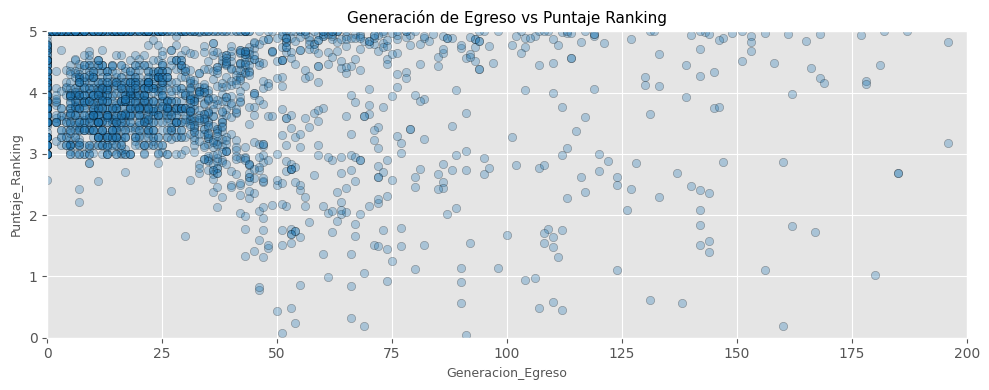

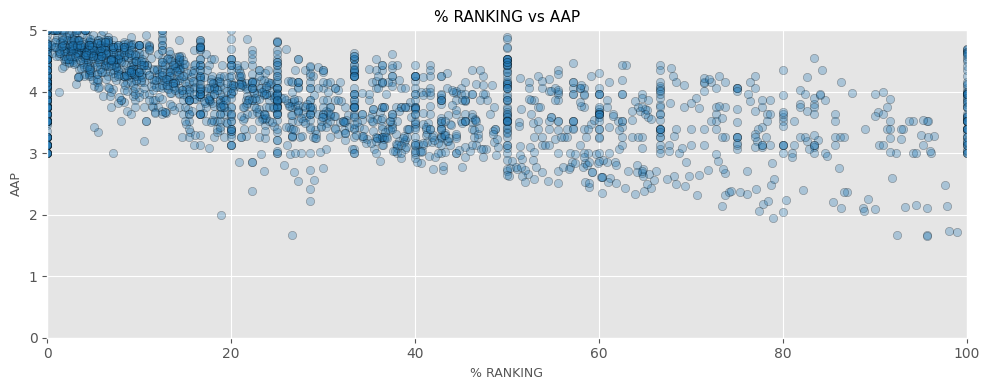

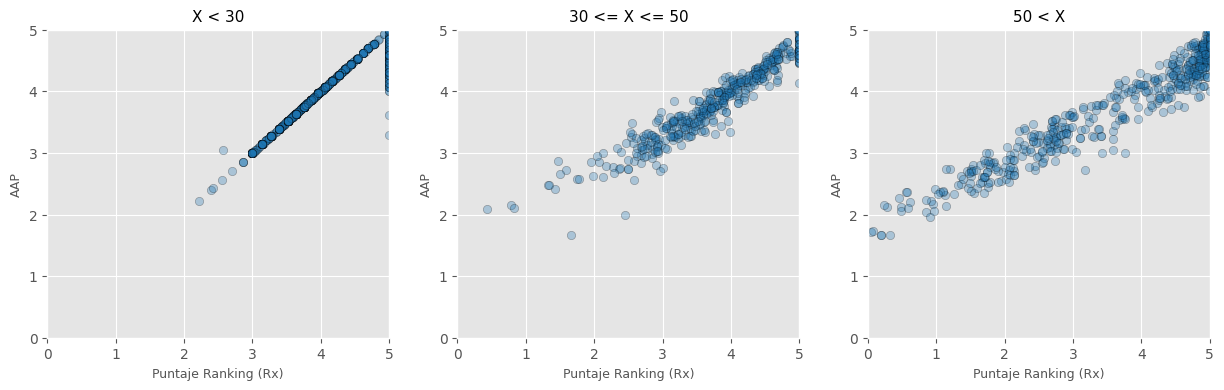

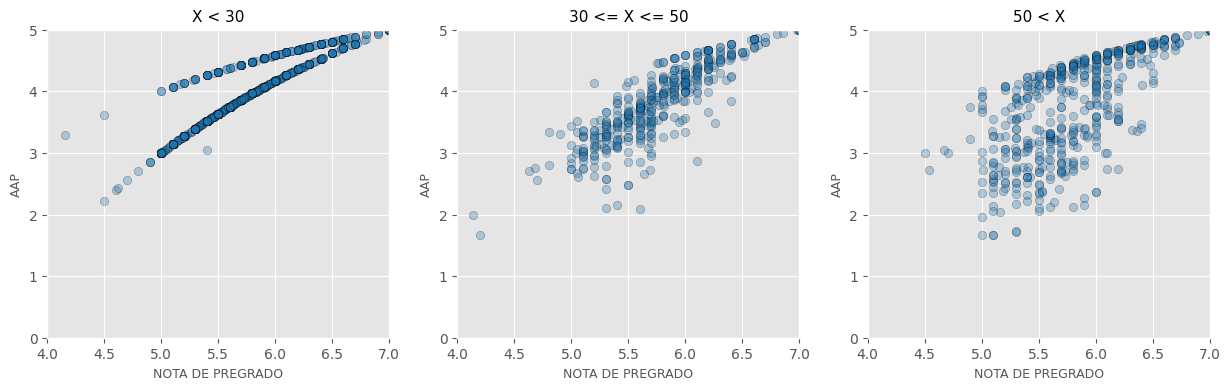

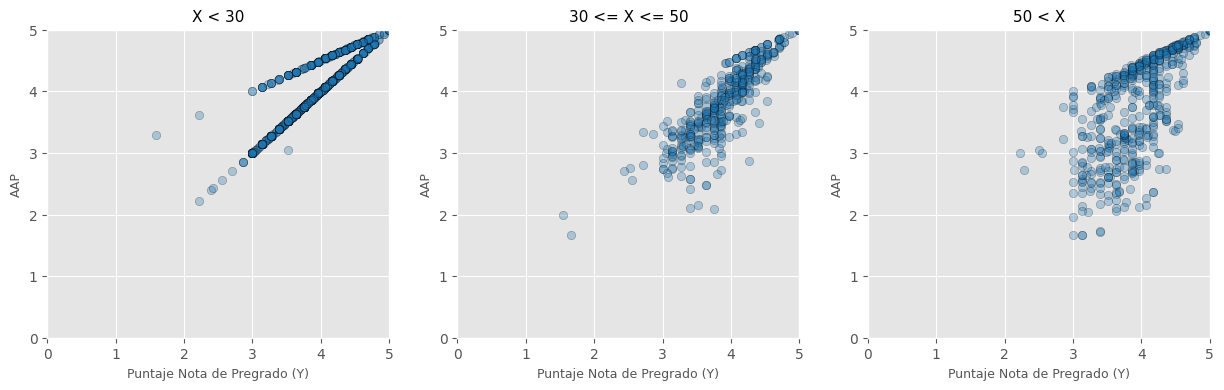

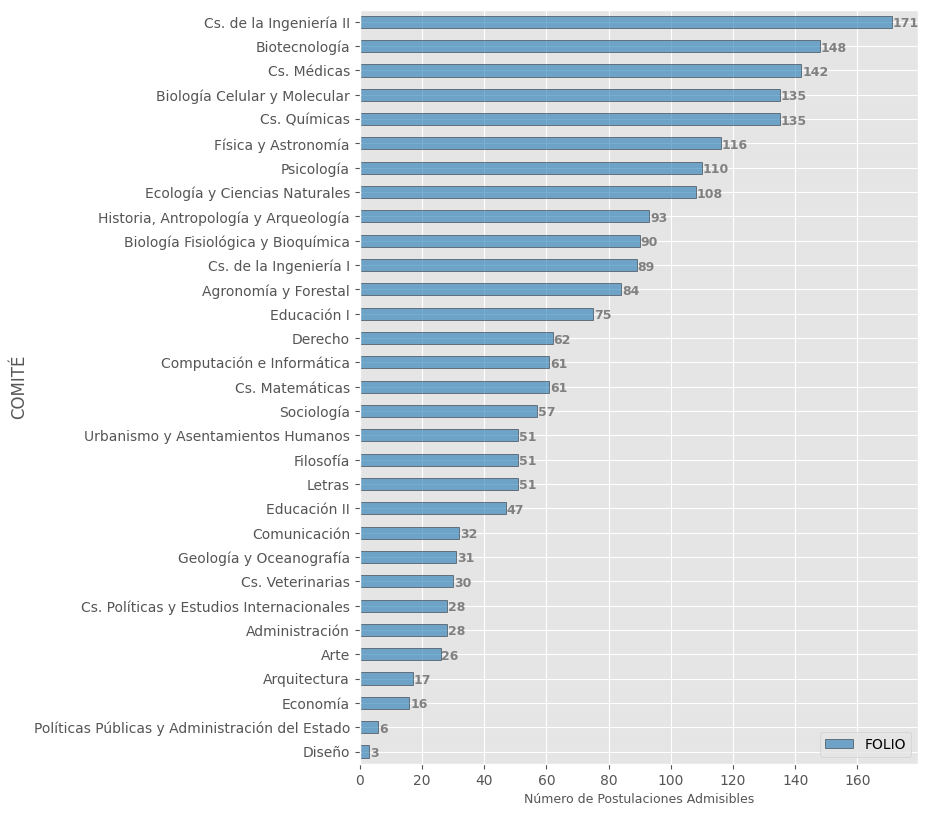

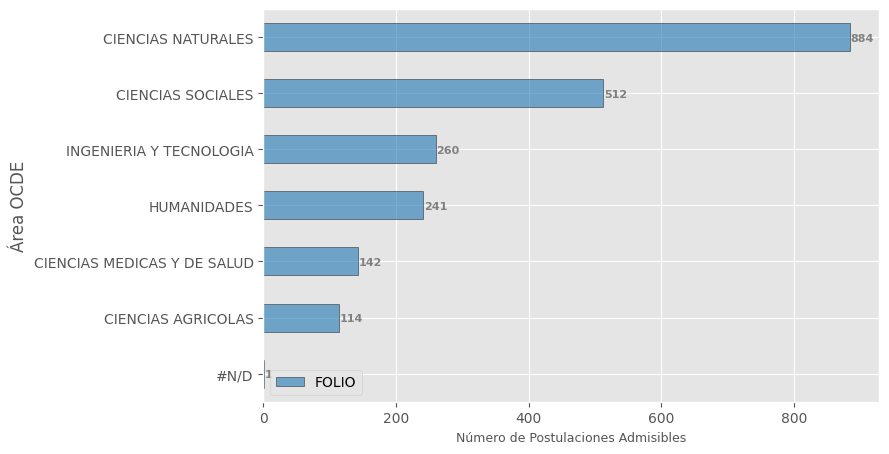

Proceso finalizado


In [ ]:

#=======================================================================================================================
#=====================================================Graficos==========================================================
#=======================================================================================================================
#Filtrada = Concurso.loc[(Concurso["ESTADO ADMISIBILIDAD"] != "FUERA DE BASES") & (Concurso["TOTAL"] != 0)]

Filtrada = Concurso.loc[(Concurso["ESTADO ADMISIBILIDAD"] != "FUERA DE BASES")]
#Usar esta en caso de querer ver a los NO RANKING

GrupoX1 = Filtrada.loc[(Filtrada["TOTAL"] < 30)]
GrupoX2 = Filtrada.loc[(Filtrada["TOTAL"] >= 30) & (Filtrada["TOTAL"] <= 50)]
GrupoX3 = Filtrada.loc[(Filtrada["TOTAL"] > 50)]


X1 = GrupoX1["TOTAL"]
X2 = GrupoX2["TOTAL"]
X3 = GrupoX3["TOTAL"]

Y1 = GrupoX1["Rx"]
Y2 = GrupoX2["Rx"]
Y3 = GrupoX3["Rx"]

Z1 = GrupoX1["AAP"]
Z2 = GrupoX2["AAP"]
Z3 = GrupoX3["AAP"]

W1 = GrupoX1["NOTA PREGRADO"]
W2 = GrupoX2["NOTA PREGRADO"]
W3 = GrupoX3["NOTA PREGRADO"]

V1 = GrupoX1["Y"]
V2 = GrupoX2["Y"]
V3 = GrupoX3["Y"]


Puntaje_Ranking = np.concatenate((Y1, Y2, Y3))
Generacion_Egreso = np.concatenate((X1, X2, X3))
AAP = np.concatenate((Z1, Z2, Z3))

#=======================================================================================================================
#==============================================Egreso vs Ptje Ranking===================================================
#=======================================================================================================================
plt.style.use('default')
plt.style.use('ggplot')
#=======================================================================================================================
plt.figure(figsize=(10, 4))
plt.title("Generación de Egreso vs Puntaje Ranking", fontdict=None, loc='center', pad=None, fontsize=11)
plt.scatter(Generacion_Egreso, Puntaje_Ranking, facecolor='#1f77b4', edgecolor='k', alpha=0.3)
plt.xlim(0, 200)
plt.ylim(0, 5)
#plt.grid(b=None, which='major', axis='both')
plt.xlabel('Generacion_Egreso', fontsize=9)
plt.ylabel('Puntaje_Ranking', fontsize=9)
plt.tight_layout()

#=======================================================================================================================
#==============================================Egreso vs Ptje Ranking===================================================
#=======================================================================================================================
plt.figure(figsize=(10, 4))
plt.title("% RANKING vs AAP", fontdict=None, loc='center', pad=None, fontsize=11)
plt.scatter(Filtrada["% RANKING"], Filtrada["AAP"], facecolor='#1f77b4', edgecolor='k', alpha=0.3)
plt.xlim(0, 100)
plt.ylim(0, 5)
#plt.grid(b=None, which='major', axis='both')
plt.xlabel('% RANKING', fontsize=9)
plt.ylabel('AAP', fontsize=9)
plt.tight_layout()

#=======================================================================================================================
#================================================Ptje Ranking vs AAP====================================================
#=======================================================================================================================

plt.figure(figsize=(15, 4))
plt.subplot(131)
plt.scatter(Y1, Z1, facecolor='#1f77b4', edgecolor='k', alpha=0.3)
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.xlabel('Puntaje Ranking (Rx)', fontsize=9)
plt.ylabel('AAP', fontsize=9)
#plt.grid(b=None, which='major', axis='both')
plt.title("X < 30", fontdict=None, loc='center', pad=None, fontsize=11)

plt.subplot(132)
plt.scatter(Y2, Z2, facecolor='#1f77b4', edgecolor='k', alpha=0.3)
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.xlabel('Puntaje Ranking (Rx)', fontsize=9)
plt.ylabel('AAP', fontsize=9)
#plt.grid(b=None, which='major', axis='both')
plt.title("30 <= X <= 50", fontdict=None, loc='center', pad=None, fontsize=11)

plt.subplot(133)
plt.scatter(Y3, Z3, facecolor='#1f77b4', edgecolor='k', alpha=0.3)
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.xlabel('Puntaje Ranking (Rx)', fontsize=9)
plt.ylabel('AAP', fontsize=9)
#plt.grid(b=None, which='major', axis='both')
plt.title("50 < X", fontdict=None, loc='center', pad=None, fontsize=11)

plt.show()

#=======================================================================================================================
#====================================================NOTA vs AAP========================================================
#=======================================================================================================================

plt.figure(figsize=(15, 4))
plt.subplot(131)
plt.scatter(W1, Z1, facecolor='#1f77b4', edgecolor='k', alpha=0.3)
plt.xlim(4, 7)
plt.ylim(0, 5)
plt.xlabel('NOTA DE PREGRADO', fontsize=9)
plt.ylabel('AAP', fontsize=9)
#plt.grid(b=None, which='major', axis='both')
plt.title("X < 30", fontdict=None, loc='center', pad=None, fontsize=11)

plt.subplot(132)
plt.scatter(W2, Z2, facecolor='#1f77b4', edgecolor='k', alpha=0.3)
plt.xlim(4, 7)
plt.ylim(0, 5)
plt.xlabel('NOTA DE PREGRADO', fontsize=9)
plt.ylabel('AAP', fontsize=9)
#plt.grid(b=None, which='major', axis='both')
plt.title("30 <= X <= 50", fontdict=None, loc='center', pad=None, fontsize=11)

plt.subplot(133)
plt.scatter(W3, Z3, facecolor='#1f77b4', edgecolor='k', alpha=0.3)
plt.xlim(4, 7)
plt.ylim(0, 5)
plt.xlabel('NOTA DE PREGRADO', fontsize=9)
plt.ylabel('AAP', fontsize=9)
#plt.grid(b=None, which='major', axis='both')
plt.title("50 < X", fontdict=None, loc='center', pad=None, fontsize=11)

plt.show()


#=======================================================================================================================
#=============================================PUNTAJE NOTA vs AAP=======================================================
#=======================================================================================================================

plt.figure(figsize=(15, 4))
plt.subplot(131)
plt.scatter(V1, Z1, facecolor='#1f77b4', edgecolor='k', alpha=0.3)
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.xlabel('Puntaje Nota de Pregrado (Y)', fontsize=9)
plt.ylabel('AAP', fontsize=9)
#plt.grid(b=None, which='major', axis='both')
plt.title("X < 30", fontdict=None, loc='center', pad=None, fontsize=11)

plt.subplot(132)
plt.scatter(V2, Z2, facecolor='#1f77b4', edgecolor='k', alpha=0.3)
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.xlabel('Puntaje Nota de Pregrado (Y)', fontsize=9)
plt.ylabel('AAP', fontsize=9)
#plt.grid(b=None, which='major', axis='both')
plt.title("30 <= X <= 50", fontdict=None, loc='center', pad=None, fontsize=11)

plt.subplot(133)
plt.scatter(V3, Z3, facecolor='#1f77b4', edgecolor='k', alpha=0.3)
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.xlabel('Puntaje Nota de Pregrado (Y)', fontsize=9)
plt.ylabel('AAP', fontsize=9)
#plt.grid(b=None, which='major', axis='both')
plt.title("50 < X", fontdict=None, loc='center', pad=None, fontsize=11)

plt.show()

#=======================================================================================================================
#========================================Postulaciones Admisibles por Comité============================================
#=======================================================================================================================
Cuenta_Folios = Filtrada[['FOLIO', 'COMITÉ']].groupby('COMITÉ').count()
Cuenta_Folios = Cuenta_Folios.sort_values('FOLIO', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last', ignore_index=False, key=None)
ax1 = Cuenta_Folios.plot.barh(figsize=(9.5, 8.1),facecolor='#1f77b4', edgecolor='k', alpha=0.6)
for i in ax1.patches:
    plt.text(i.get_width() + 0.3, i.get_y() + 0.04,
             str(round((i.get_width()), 2)),
             fontsize=9, fontweight='bold',
             color='grey')

plt.xlabel('Número de Postulaciones Admisibles', fontsize=9)
plt.subplots_adjust(left=0.388,right=0.976,top=0.988,bottom=0.057)
plt.grid(True)
#plt.title()
plt.show()


#=======================================================================================================================
#=====================================Postulaciones Admisibles por Área OCDE============================================
#=======================================================================================================================
Cuenta_OCDE = Filtrada[['FOLIO', 'Área OCDE']].groupby('Área OCDE').count()
Cuenta_OCDE = Cuenta_OCDE.sort_values('FOLIO', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last', ignore_index=False, key=None)
ax2 = Cuenta_OCDE.plot.barh(figsize=(9.5, 5.1),facecolor='#1f77b4', edgecolor='k', alpha=0.6)
for i in ax2.patches:
    plt.text(i.get_width() + 1.1, i.get_y() + 0.183,
             str(round((i.get_width()), 2)),
             fontsize=8, fontweight='bold',
             color='grey')

plt.xlabel('Número de Postulaciones Admisibles', fontsize=9)
plt.subplots_adjust(left=0.314,right=0.962)
plt.grid(True)
#plt.title()
plt.show()

#=======================================================================================================================
#=================================================DESPEDIDA=============================================================
#=======================================================================================================================

print('Proceso finalizado')